[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/main/tutorials/feature-use/lagged_covariates_energy_ercot.ipynb)

# Using Lagged Regressors

In [7]:
if "google.colab" in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes

import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

set_log_level("ERROR")

In [8]:
data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
df_ercot = pd.read_csv(data_location + "multivariate/load_ercot_regions.csv")
df_ercot_y = pd.read_csv(data_location + "energy/load_ercot.csv")
df_ercot["y"] = df_ercot_y["y"]
df_ercot.head()

,ds,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,y
0,2004-01-01 01:00:00,7225.09,877.79,1044.89,745.79,7124.21,1660.45,3639.12,654.61,22971.94
1,2004-01-01 02:00:00,6994.25,850.75,1032.04,721.34,6854.58,1603.52,3495.16,639.88,22191.52
2,2004-01-01 03:00:00,6717.42,831.63,1021.10,699.70,6639.48,1527.99,3322.70,623.42,21383.44
3,2004-01-01 04:00:00,6554.27,823.56,1015.41,691.84,6492.39,1473.89,3201.72,613.49,20866.56
4,2004-01-01 05:00:00,6511.19,823.38,1009.74,686.76,6452.26,1462.76,3163.74,613.32,20723.15


In [9]:
regions = list(df_ercot)[1:-1]

In [10]:
df_ercot["y"].isnull().sum()

0

## Baseline Model

In [11]:
df = pd.DataFrame({"ds": df_ercot["ds"], "y": df_ercot["y"]})
m = NeuralProphet(
    learning_rate=0.1,
)
metrics = m.fit(df, freq="H")

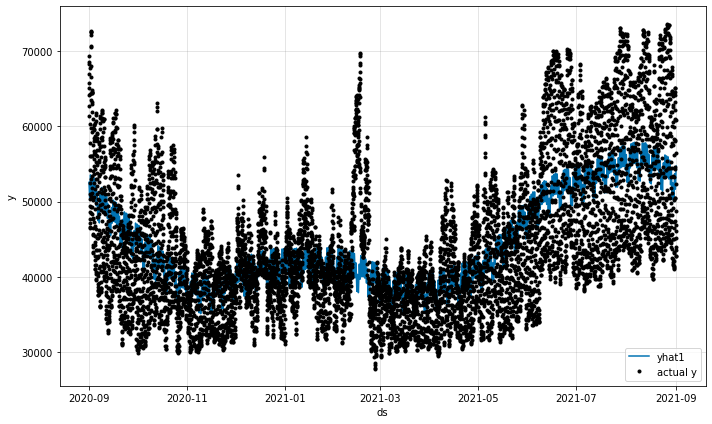

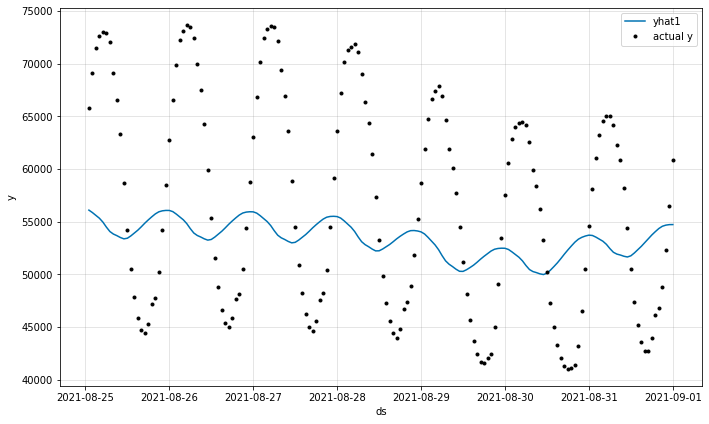

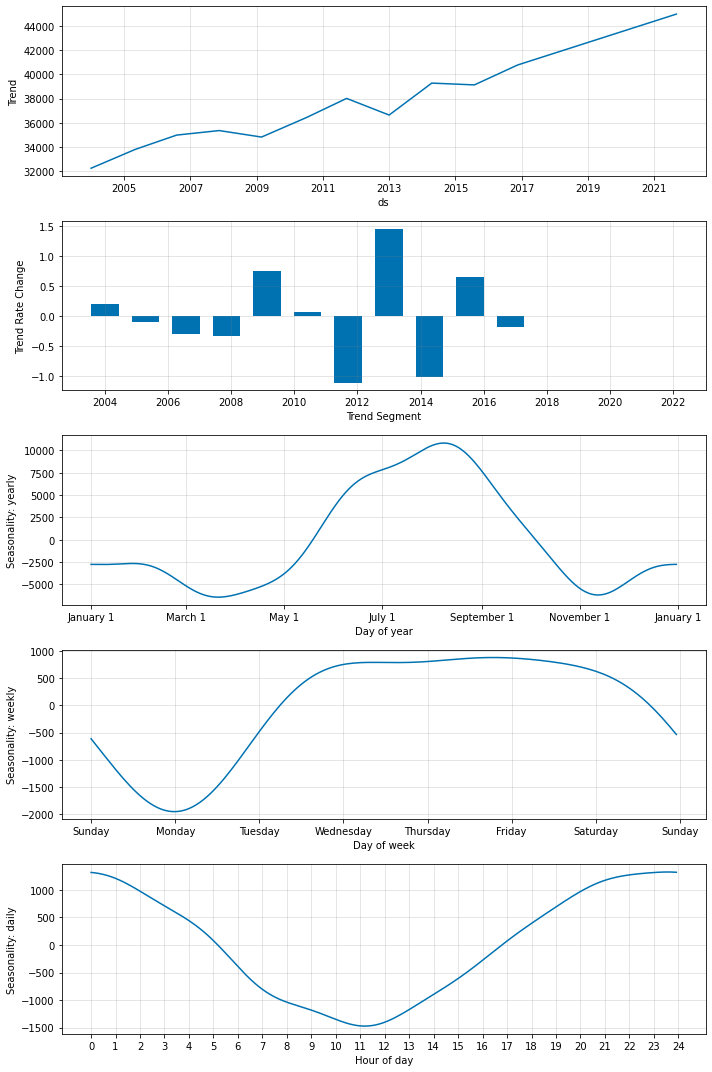

In [6]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365 * 24 :])
fig2 = m.plot(forecast[-7 * 24 :])
# comp = m.plot_components(forecast)
param = m.plot_parameters()

##  3-steps ahead AR Model

In [7]:
df = pd.DataFrame({"ds": df_ercot["ds"], "y": df_ercot["y"]})
m = NeuralProphet(
    n_forecasts=3,
    n_lags=3,
    learning_rate=0.1,
)
m = m.highlight_nth_step_ahead_of_each_forecast(3)
metrics = m.fit(df, freq="H")

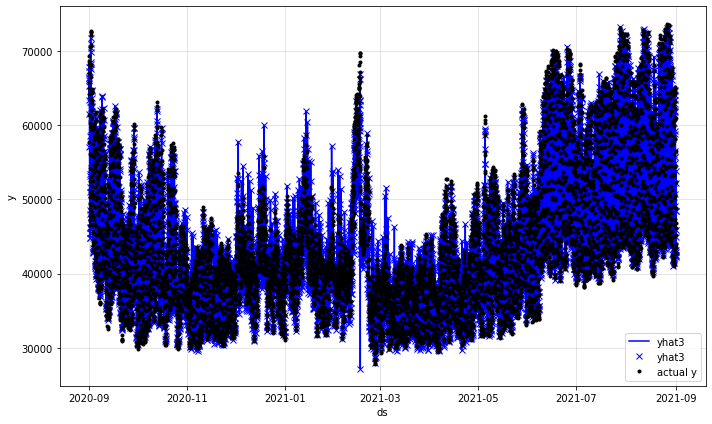

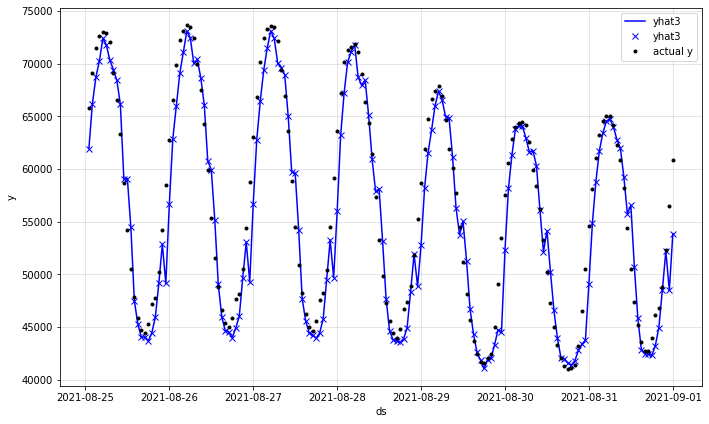

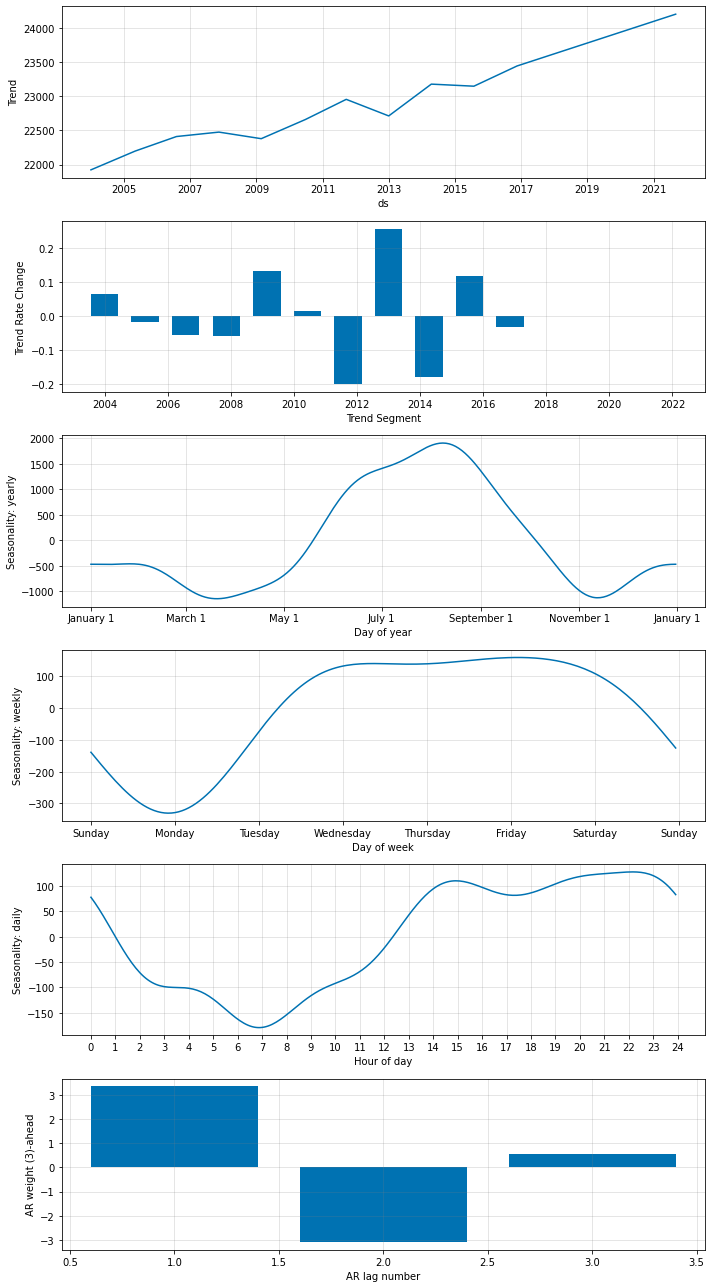

In [8]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365 * 24 :])
fig2 = m.plot(forecast[-7 * 24 :])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

## 3-steps ahead AR and Lagged Regressors Model

In [9]:
df = df_ercot
m = NeuralProphet(
    n_forecasts=3,
    n_lags=3,
    learning_rate=0.1,
)
m = m.add_lagged_regressor(names=regions)  # , only_last_value=True)
m.highlight_nth_step_ahead_of_each_forecast(3)
metrics = m.fit(df, freq="H")

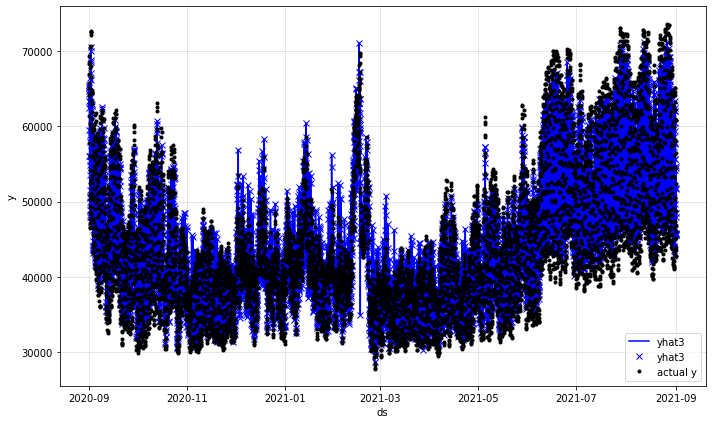

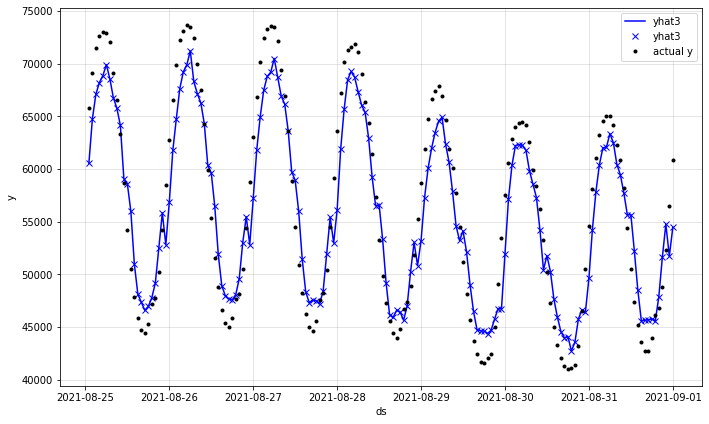

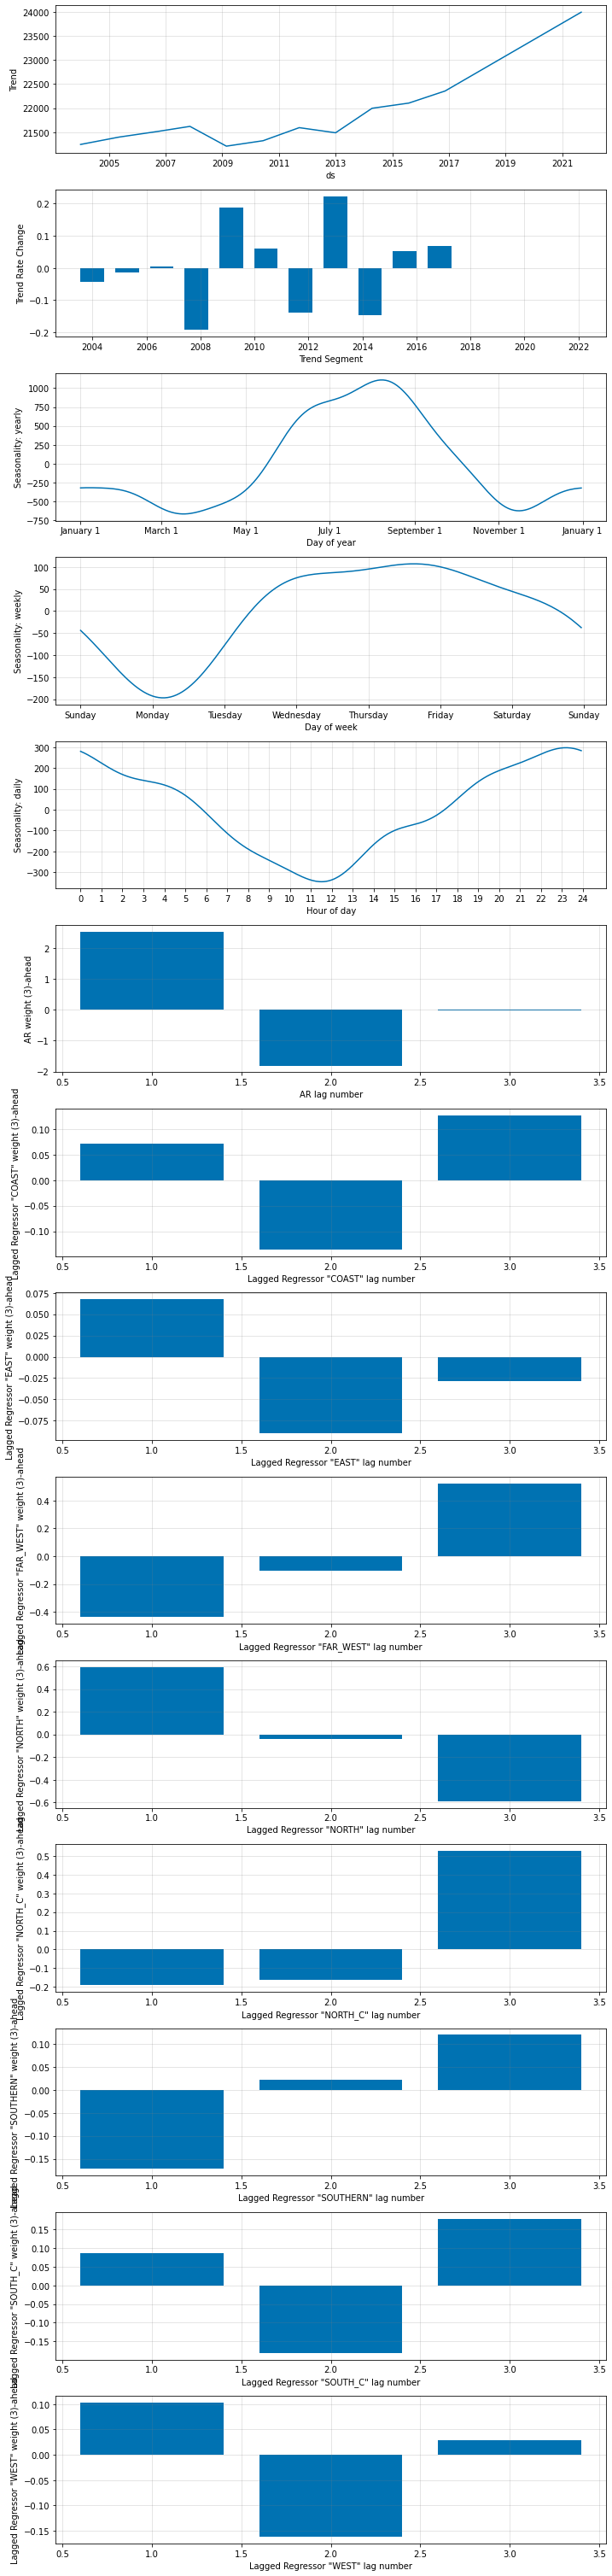

In [10]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365 * 24 :])
fig2 = m.plot(forecast[-7 * 24 :])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

## 24-steps ahead Long AR Model

In [11]:
df = pd.DataFrame({"ds": df_ercot["ds"], "y": df_ercot["y"]})
m = NeuralProphet(
    n_forecasts=24,
    n_lags=7 * 24,
    learning_rate=0.1,
)
m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

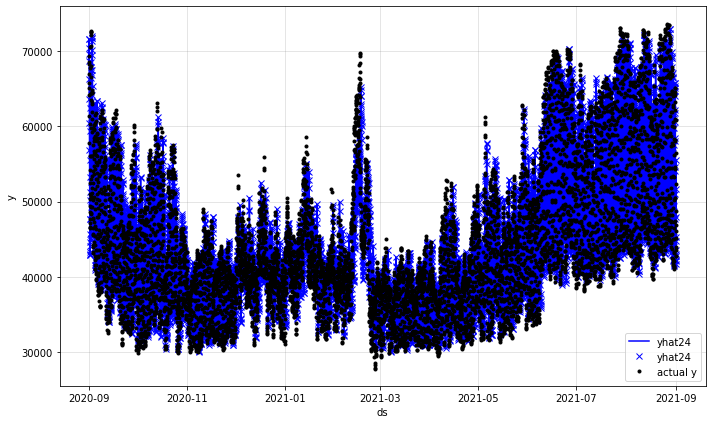

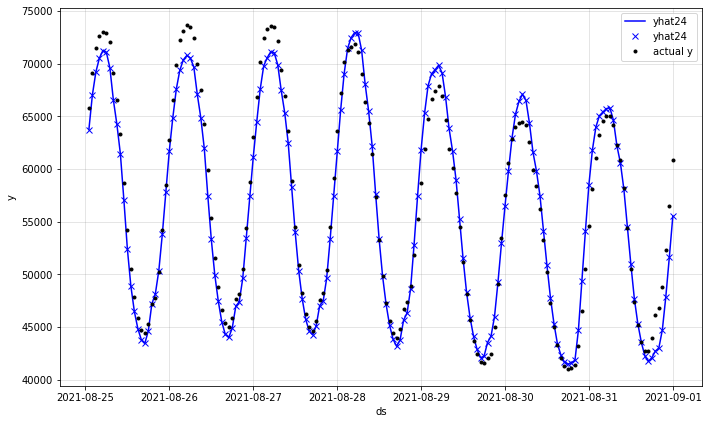

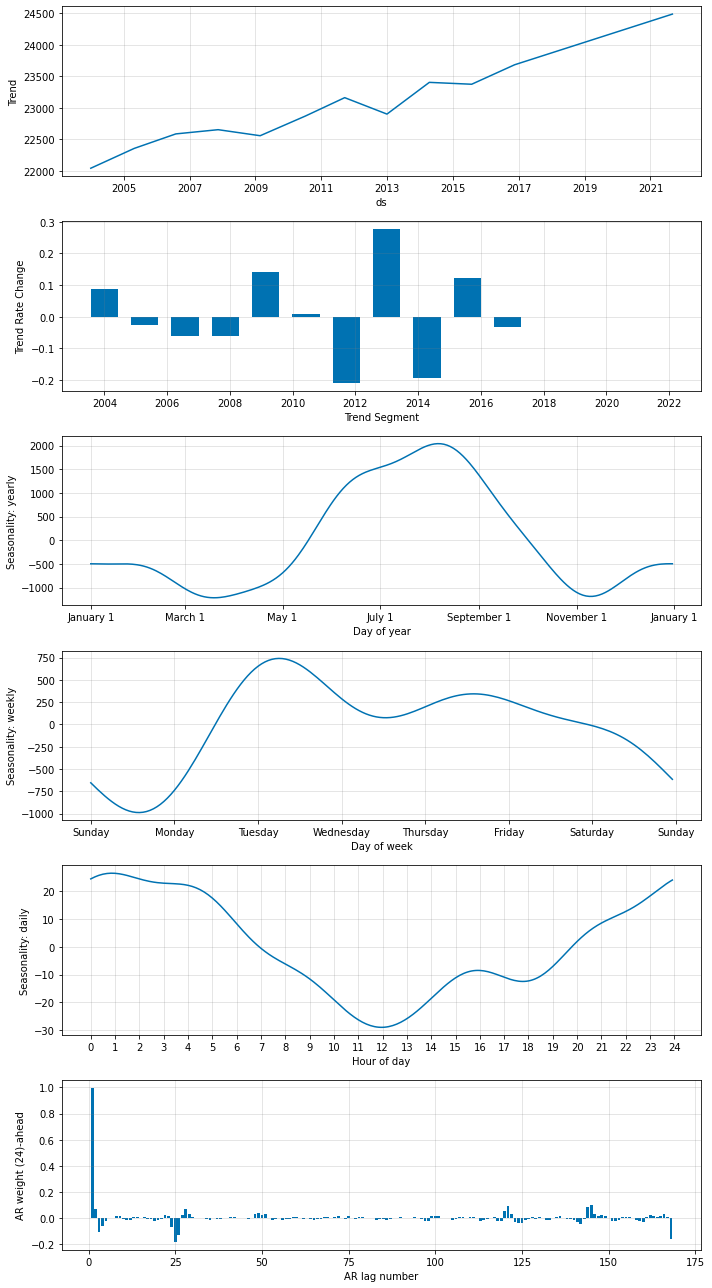

In [12]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365 * 24 :])
fig2 = m.plot(forecast[-7 * 24 :])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

## 24-steps ahead Long AR Model with last observation of Lagged Regressors

In [14]:
df = df_ercot
m = NeuralProphet(
    n_forecasts=24,
    n_lags=7 * 24,
    learning_rate=0.1,
)
m = m.add_lagged_regressor(names=regions)
m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

WARNING - (py.warnings._showwarnmsg) - /Users/karl/git/neural_prophet/neuralprophet/forecaster.py:3085: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - /Users/karl/git/neural_prophet/neuralprophet/forecaster.py:3085: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - /Users/karl/git/neural_prophet/neuralprophet/forecaster.py:3085: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

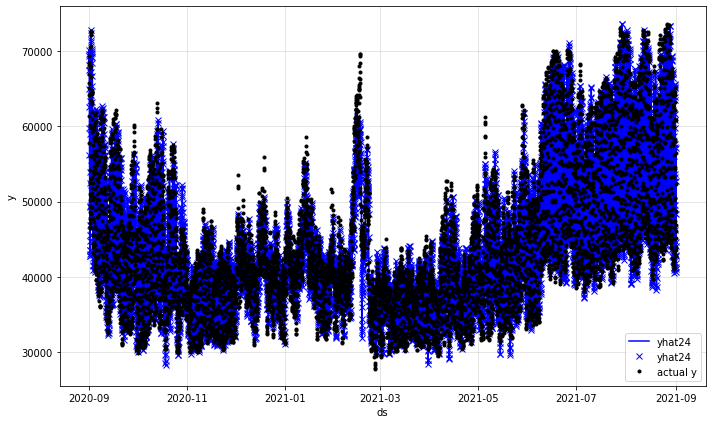

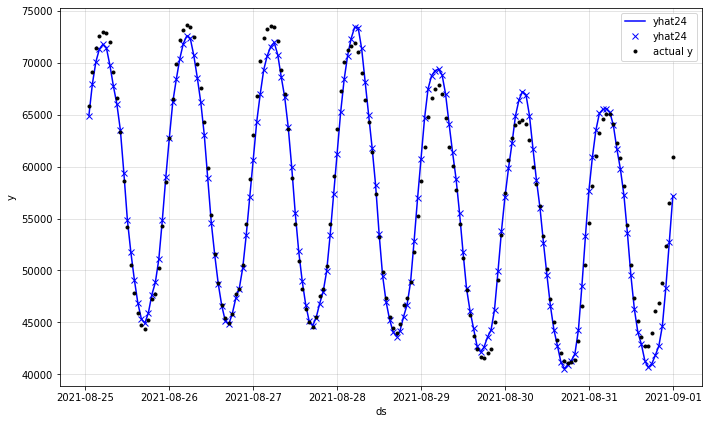

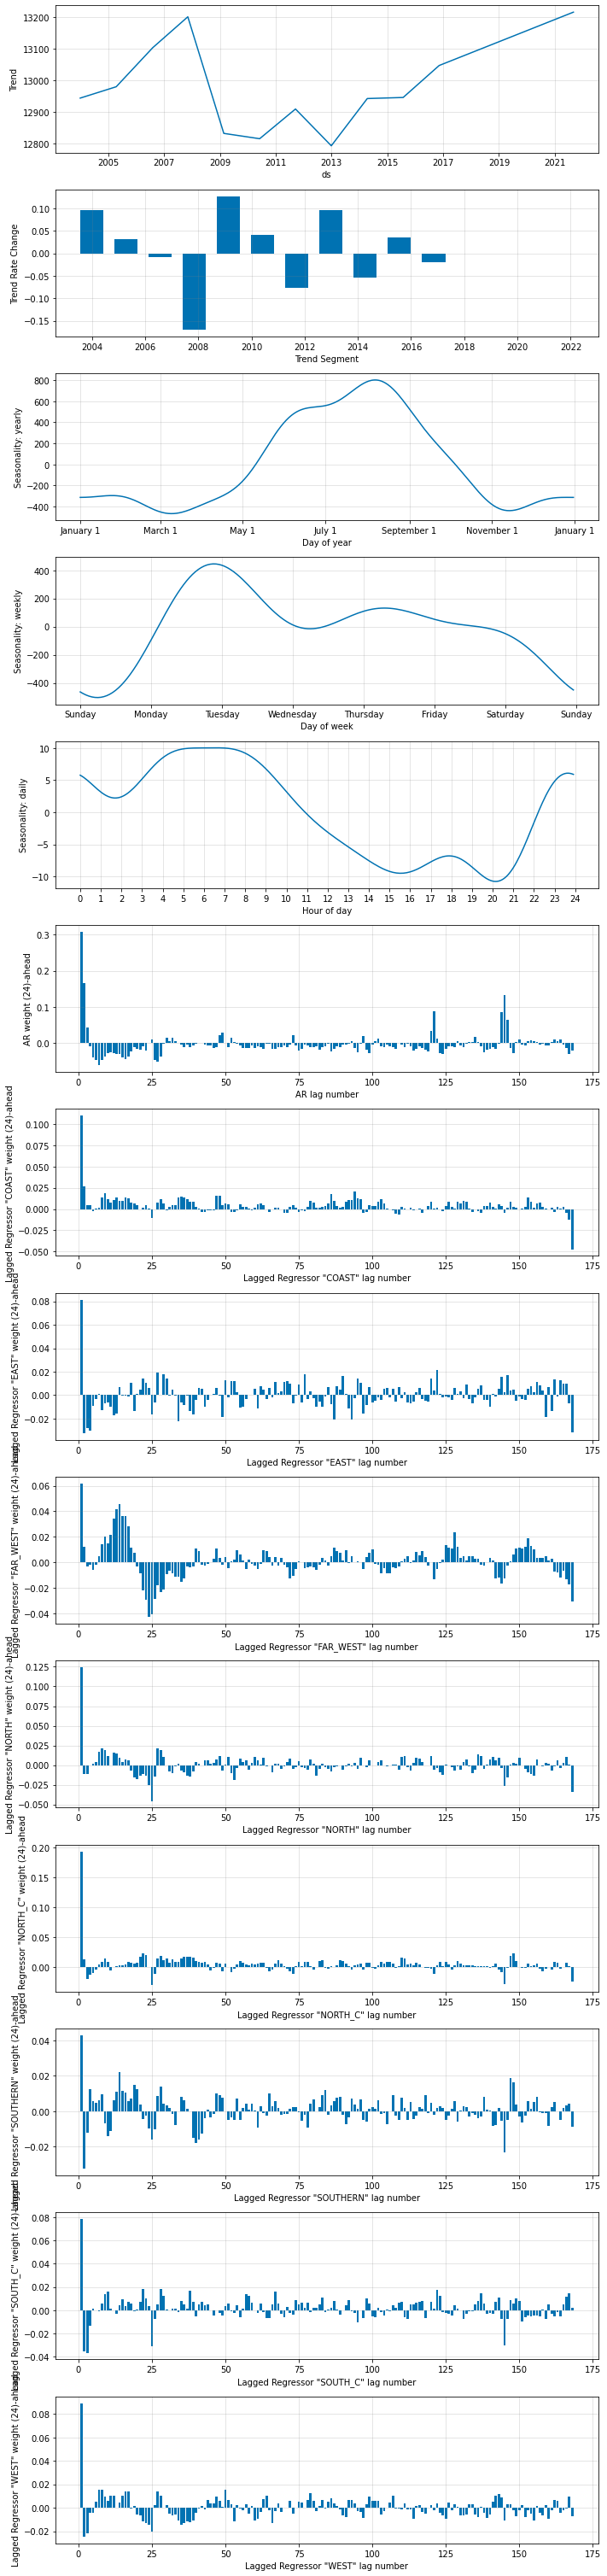

In [15]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365 * 24 :])
fig2 = m.plot(forecast[-7 * 24 :])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

## 24-steps ahead AR Model with full Lagged Regressors

In [16]:
df = df_ercot
m = NeuralProphet(
    n_forecasts=24,
    n_lags=24,
    learning_rate=0.01,
)
m = m.add_lagged_regressor(names=regions)
m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

WARNING - (py.warnings._showwarnmsg) - /Users/karl/git/neural_prophet/neuralprophet/forecaster.py:3085: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - /Users/karl/git/neural_prophet/neuralprophet/forecaster.py:3085: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - /Users/karl/git/neural_prophet/neuralprophet/forecaster.py:3085: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

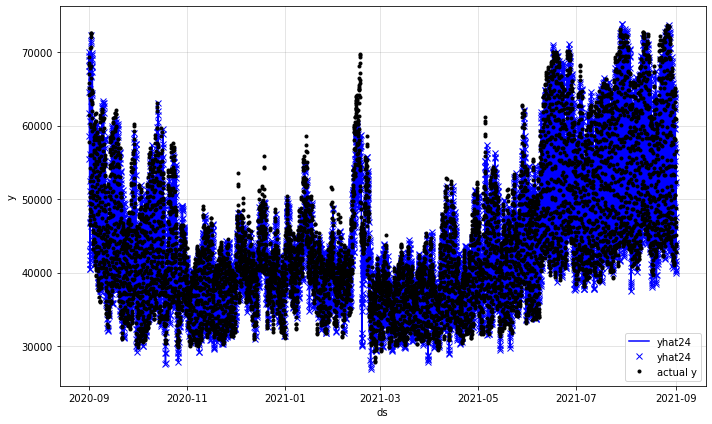

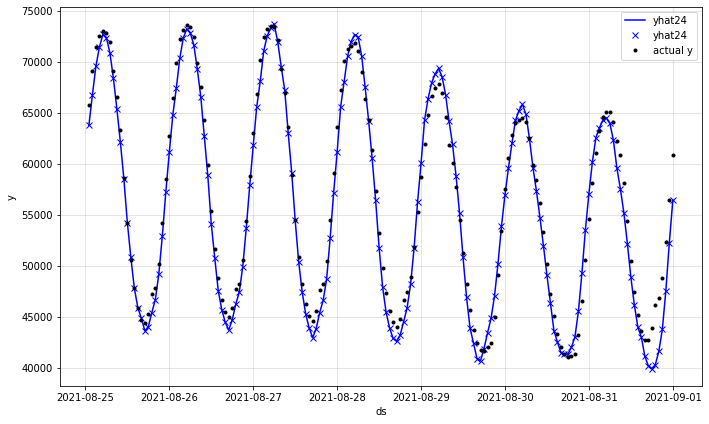

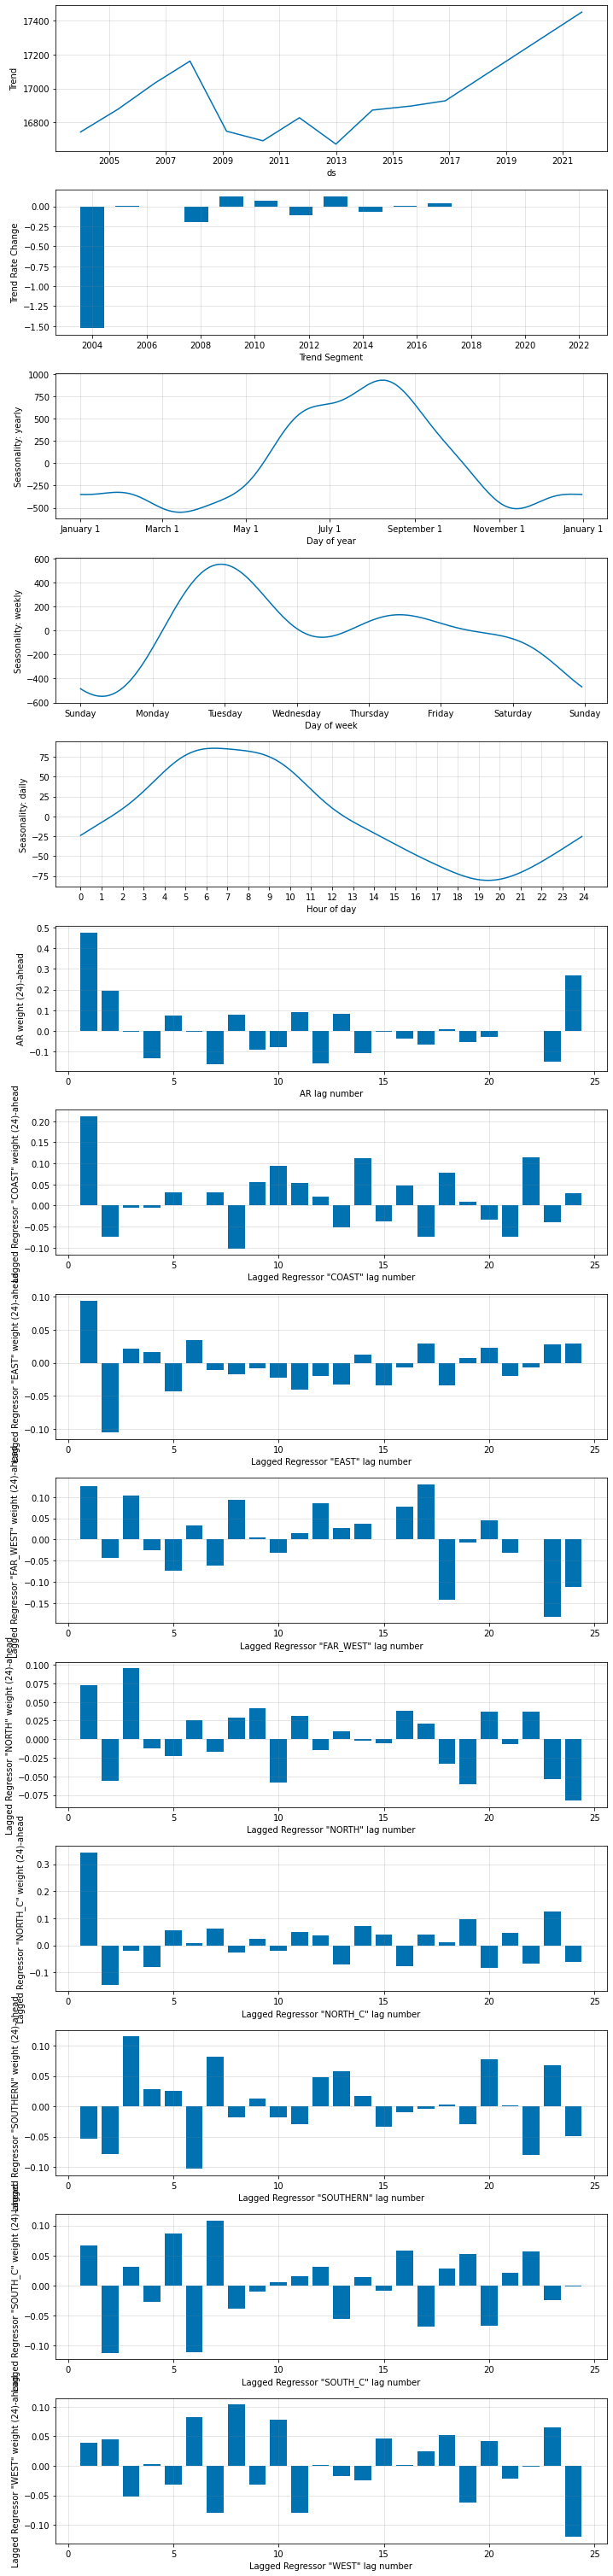

In [17]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365 * 24 :])
fig2 = m.plot(forecast[-7 * 24 :])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

## 24-steps ahead Neural Model with Long AR

In [ ]:
df = pd.DataFrame({"ds": df_ercot["ds"], "y": df_ercot["y"]})
m = NeuralProphet(
    n_forecasts=24,
    n_lags=7 * 24,
    learning_rate=0.01,
    ar_layers=[16],
)
m = m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

# metrics

In [18]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365 * 24 :])
fig2 = m.plot(forecast[-7 * 24 :])
comp = m.plot_components(forecast[-7 * 24 :])
# param = m.plot_parameters()

## 24-steps ahead Neural Model with Long AR and Lagged Regressors

In [12]:
df = df_ercot
m = NeuralProphet(
    n_forecasts=24,
    n_lags=7 * 24,
    learning_rate=0.01,
    ar_layers=[16],
    lagged_reg_layers=[16],
)
m = m.add_lagged_regressor(names=regions)  # , only_last_value=True)
m = m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

# metrics

Training: 0it [00:00, ?it/s]

In [13]:
forecast = m.predict(df)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365 * 24 :])
fig2 = m.plot(forecast[-7 * 24 :])
comp = m.plot_components(forecast[-7 * 24 :])
# param = m.plot_parameters()

Predicting: 1209it [00:00, ?it/s]

In [14]:
m.model.get_covar_weights()["COAST"]

tensor([[-0.0074, -0.0029, -0.0010,  ...,  0.0068,  0.0118,  0.0274],
        [-0.0073, -0.0029, -0.0010,  ...,  0.0068,  0.0117,  0.0271],
        [-0.0084, -0.0034, -0.0012,  ...,  0.0078,  0.0135,  0.0313],
        ...,
        [-0.0204, -0.0081, -0.0029,  ...,  0.0189,  0.0327,  0.0757],
        [-0.0173, -0.0069, -0.0024,  ...,  0.0161,  0.0278,  0.0644],
        [-0.0145, -0.0058, -0.0020,  ...,  0.0134,  0.0232,  0.0539]])

In [15]:
m.model.get_covar_weights()["WEST"]

tensor([[-0.0049,  0.0017,  0.0016,  ..., -0.0047, -0.0002,  0.0213],
        [-0.0049,  0.0017,  0.0015,  ..., -0.0047, -0.0002,  0.0211],
        [-0.0057,  0.0019,  0.0018,  ..., -0.0054, -0.0002,  0.0244],
        ...,
        [-0.0137,  0.0047,  0.0043,  ..., -0.0131, -0.0005,  0.0590],
        [-0.0116,  0.0040,  0.0037,  ..., -0.0111, -0.0004,  0.0502],
        [-0.0097,  0.0033,  0.0031,  ..., -0.0093, -0.0004,  0.0420]])